In [311]:
%reset -f

In [312]:
import sys, os
sys.path.append(os.path.dirname(os.path.realpath('../utils')))
import numpy as np
from utils.iwavelets import xphi0

In [313]:
# cjk, cjknum, zJc, zJcnum = cjkfun(VJ, J, j0, a, b, eps0)

In [314]:
j0 = 0
J = 15
a = 0
b = 2
eps0 = 0.005
deltax = (b-a)/(2**J)
XJ0 = np.arange(a, b+deltax, deltax).reshape(1,-1)
VJ = np.sin(np.pi * XJ0)

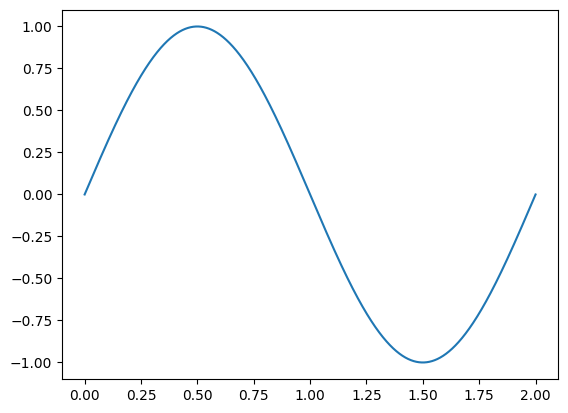

In [315]:
from matplotlib import pyplot as plt 

plt.plot(XJ0[0, :], VJ[0, :])

In [316]:
k0 = np.arange(0, 2**j0 + 1).reshape(1,-1)
nn = k0 * (2**(J-j0))
ff2 = VJ[0,nn[0]].reshape(1,-1)

In [317]:
cjk0 = []
cjk = [np.array([0])]
cjknum = []
zJc0 = nn[0]
print('cjk: ', cjk, '\n', \
      'cjknum: ', cjknum, '\n', \
      'zJc0: ', zJc0)

cjk:  [array([0])] 
 cjknum:  [] 
 zJc0:  [    0 32768]


In [364]:
j = 6

In [365]:
deltaj = (b-a)/2/(2**j)
k = np.arange(0, 2**j).reshape((1,-1))
x = a + (2 * k + 1) * deltaj
nn = (2*k+1) * (2**(J-(j+1)))
theta = xphi0(j0, k0, a, b, x)
s1 = np.dot(ff2 , theta.T)
s2 = 0
for j1 in range(j0, j):
        # j1层的所有k1索引的单变量，向量形式构建，一次性全部算出
        k1 = np.arange(0, 2 ** j1).reshape((1,-1))
        # \psi_{j_1 k_1}(x_{j+1,2k+1}) == \phi_{j_1 + 1, 2*k_1 + 1}(x_{j+1,2k+1})
        theta = xphi0(j1 + 1,2 * k1 + 1,a,b,x)
        # \sum\limits_{k_1 \in Z^j_1}\alpha_{j_1 k_1}\psi_{j_1 k_1}(x_{j+1,2k+1})
        s2 = s2 + np.dot(cjk0[j1][0][k1], theta.T)  # cjk0[j1][0][k1] : 即\alpha_{j_1 k_1}
ff1 = VJ[0,nn[0]].reshape((1,-1)) 


Text(0.5, 1.0, 'true - approximation')

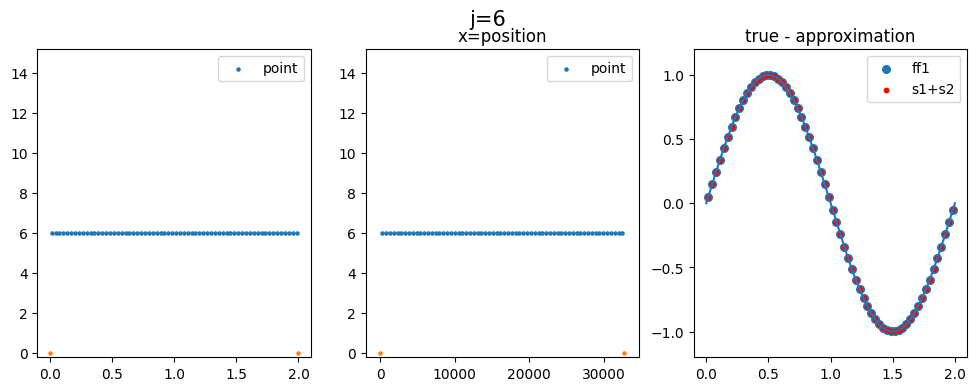

In [366]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
plt.suptitle("j={}".format(j), fontsize='15')

axes[0].scatter(x, np.zeros_like(x)+j, s=5, label='point')
axes[0].scatter([a, b], [0, 0], s=5)
axes[0].set_ylim([-0.2, 15.2])
axes[0].set_xlim([-0.1,2.1])
axes[0].legend()

axes[1].scatter(nn, np.zeros_like(nn)+j, s=5, label='point')
axes[1].scatter([0, 2**J], [0, 0], s=5)
axes[1].set_ylim([-0.2, 15.2])
axes[1].set_xlim([-2000,34768])
axes[1].set_title('x=position')
axes[1].legend()

axes[2].scatter(x, ff1, s=30, label='ff1')
tmps = s1 + s2
axes[2].scatter(x, tmps, c='red', s=10, label='s1+s2')
axes[2].plot(XJ0[0, :], VJ[0, :])
axes[2].set_ylim([-1.2, 1.2])
axes[2].set_xlim([-0.1,2.1])
axes[2].legend()
plt.title('true - approximation')

In [367]:
cjk0.append(ff1 - s1 - s2)
cjkvalue = abs(ff1 - s1 - s2)
kk = np.flatnonzero(cjkvalue >= eps0)

Text(0.5, 1.0, 'true - approximation')

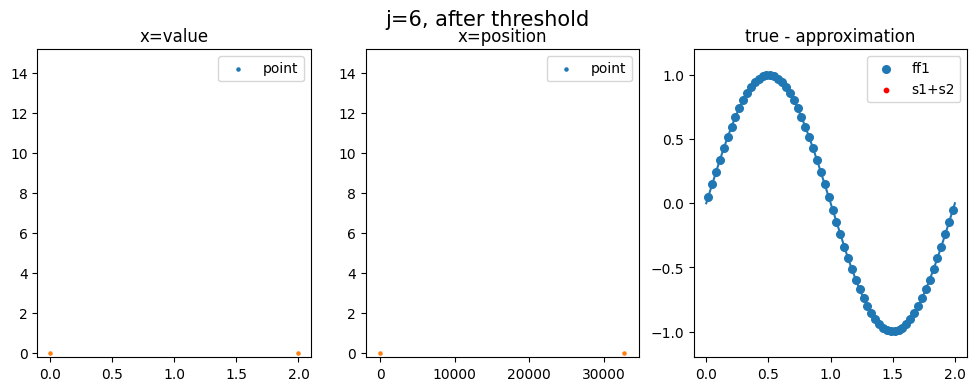

In [368]:
if kk.shape[0] == 0:
        saved_point = []
else:
        saved_point = tmps[0,kk]
        
x_saved = x[0,kk]
saved_position = (2 * kk + 1) * (2 ** (J - j - 1))

fig, axes = plt.subplots(1, 3, figsize=(12,4))
plt.suptitle("j={}, after threshold".format(j), fontsize='15')

axes[0].scatter(x_saved, np.zeros_like(x_saved) + j, s=5, label='point')
axes[0].scatter([a, b], [0, 0], s=5)
axes[0].set_ylim([-0.2, 15.2])
axes[0].set_xlim([-0.1,2.1])
axes[0].set_title('x=value')
axes[0].legend()

axes[1].scatter(saved_position, np.zeros_like(saved_position) + j, s=5, label='point')
axes[1].scatter([0, 2**J], [0, 0], s=5)
axes[1].set_ylim([-0.2, 15.2])
axes[1].set_xlim([-2000,34768])
axes[1].set_title('x=position')
axes[1].legend()

axes[2].scatter(x, ff1, s=30, label='ff1')
tmps = s1 + s2
axes[2].scatter(x_saved, saved_point, c='red', s=10, label='s1+s2')
axes[2].plot(XJ0[0, :], VJ[0, :])
axes[2].set_ylim([-1.2, 1.2])
axes[2].set_xlim([-0.1,2.1])
plt.legend()
plt.title('true - approximation')

In [369]:
num = kk.shape[0]
if num > 0:
        cjk.append(kk)
        zJc0 = np.append(zJc0, (2 * kk + 1) * (2 ** (J - j - 1)), 0)
cjknum.append(num)
if j >  j0 + 2 and num == 0:
    cjknum += [0]*(J-j-1)
print('cjk: ', cjk, '\n', \
      'cjknum: ', cjknum, '\n', \
      'zJc0: ', zJc0)

cjk:  [array([0]), array([0, 1], dtype=int64), array([0, 1, 2, 3], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), array([ 0,  1, 14, 15], dtype=int64), array([ 0, 31], dtype=int64)] 
 cjknum:  [0, 2, 4, 8, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 zJc0:  [    0 32768  8192 24576  4096 12288 20480 28672  2048  6144 10240 14336
 18432 22528 26624 30720  1024  3072 29696 31744   512 32256]


(0.0, 15.0)

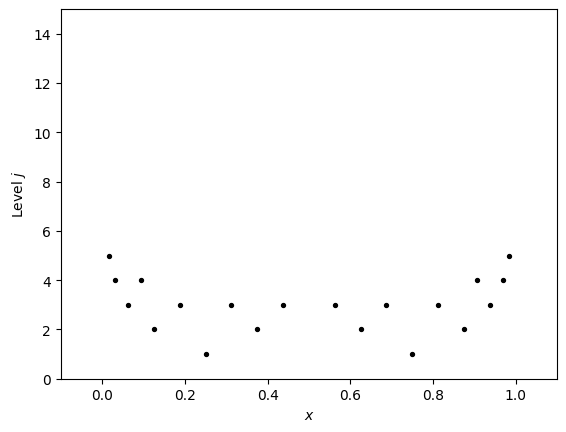

In [370]:
for j in range(j0, j+1):
    deltax = (b - a) / 2 ** (j+1)
    k = np.arange(cjknum[j])
    if(k.shape[0]==0):
        continue
    Y1 = np.zeros(k.shape[0]) + j
    X1 = (0.5 + cjk[j]) * deltax
    plt.scatter(X1, Y1, s=8, c='k')

plt.xlabel(r'$x$')
plt.ylabel(r'Level $j$')

plt.xlim([-0.1,1.1])
plt.ylim([0, J])